**Set the parameters to create an “unstable” system and apply “constant 
gain negative state-feedback” to make the system stable.**


In [10]:
from control import *
import numpy as np
from pandas import DataFrame

Set parameters for the inverted pendulum. Let 
$$
    g = 9.8 \mathrm{\ m/s^2} \\
    M = 2 \mathrm{\ kg} \\
    m = 1 \mathrm{\ kg} \\
    l = 0.5 \mathrm{\ m}\\
$$

In [15]:
m = 1
M = 2
g = 9.81
l = 0.5

In [16]:
A = np.array([[0,1,0,0],[0,0,-(m*g)/M,0],[0,0,0,1],[0,0,(M+m)*g/(M*l),0]])
B = np.array([[0],[1/M],[0],[-1/(M*l)]])
C = np.array([1,0,0,0])
D = 0

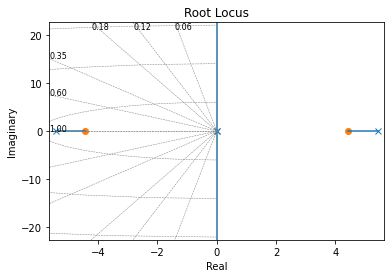

In [17]:
sys = control.ss(A,B,C,D)
r = control.rlocus(sys)

As can be seen, there are poles on the left half plane. Thus the system is unstable. Let us arbritrarily pick 4 poles such that the system can be made stable for some forward gain. Let the chosen poles be at (-5±j) and (-3±5j).

In [18]:
poles = [-5+1j,-5-1j,-3+5j,-3-5j]
k = control.place(A,B,poles)
print(k)

[[ -90.11213048  -50.5606524  -194.48606524  -41.2803262 ]]


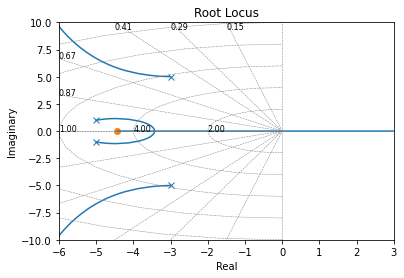

In [19]:
Afb = (A-np.dot(B,k))
sysfb = control.ss(Afb,B,C,D)

r = control.rlocus(sysfb,xlim=[-6,3],ylim=[-10,10])

In [20]:
print(Afb)

[[   0.            1.            0.            0.        ]
 [  45.05606524   25.2803262    92.33803262   20.6401631 ]
 [   0.            0.            0.            1.        ]
 [ -90.11213048  -50.5606524  -165.05606524  -41.2803262 ]]
